# Image palette analysis using k-means clustering

## What is k-means clustering?

K-means clustering is a  machine learning algorithm used for grouping similar data points together. At its core, it's a method that divides a dataset into distinct, non-overlapping groups (clusters) where each data point belongs to exactly one group.

### How k-means works

 1. **Choose *k*:** select how many clusters (*k*) to create in the data.
 2. **Initialize centroids:** the algorithm randomly selects *k* data points as initial cluster centers, called centroids.
 3. **Assign points:** each data point in the dataset is assigned to the nearest centroid, forming *k* clusters.
 4. **Update centroids:** the algorithm recalculates each centroid by taking the mean of all data points assigned to that cluster.
 5. **Repeat:** steps 3 and 4 are repeated until the centroids no longer change significantly or a maximum number of iterations is reached.

### Key features

 - **Unsupervised:** no labelled data is required; the algorithm finds patterns on its own
 - **Distance-based:** uses Euclidean distance (or other metrics) to determine similarity
 - **Iterative:** converges gradually to an optimal solution
 - **Simple and efficient:** works well with large datasets

## Using k-means to find colours in images

Digital images are made of tiny dots called pixels. Each pixel has a colour created by mixing red, green, and blue light. We represent these colours with three numbers from 0 to 255:

- black is `(0,0,0)`
- white is `(255,255,255)`
- all other colours fall in between

Since images are just collections of these number groups, we can analyse them using k-means clustering.

When we use k-means on an image with 5 clusters, it finds the 5 most representative colours in the image. These colors make up the image's basic colour palette.

This works because k-means groups similar colours together and finds the average colour for each group. The result shows us the main colours that dominate the image.

## Using this guide

While this guide can simply be read as prose, it does contain snippets of code written in Python, and is also available as an interactive notebook:

- [Colab](https://colab.research.google.com/github/StateLibraryVictoria-SLVLAB/how-to-guides/blob/main/maniiifestor-browser-extension/k_means_clustering_image_analysis.ipynb)

## Installing the required packages

This tutorial will make use of two Python packages that are popular, well-documented and open-source:

- OpenCV [https://github.com/opencv/opencv-python](https://github.com/opencv/opencv-python)
- Scikit learn [https://scikit-learn.org/stable/](https://scikit-learn.org/stable)

Install them using `pip`

In [2]:
!pip install opencv-python scikit-learn

## Preparing the image

To illustrate this guide, a colourful image of Primroses was selected from State Library Victoria's collection of digitised material [https://viewer.slv.vic.gov.au/?entity=IE1510990&mode=browse](https://viewer.slv.vic.gov.au/?entity=IE1510990&mode=browse)

In order to use the k-means clustering algorithm on image data, we need to convert the image to numeric values.

To begin with, we will need to request the image content in bytes using the `.content` method and create a NumPy array containing the RGB values for each pixel.

Note: the image URL uses the IIIF-powered imaging service, and is derived from the images presentation manifest - [https://rosetta.slv.vic.gov.au/delivery/iiif/presentation/2.1/IE1510990/manifest](https://rosetta.slv.vic.gov.au/delivery/iiif/presentation/2.1/IE1510990/manifest)

In [3]:
import cv2 as cv
import requests
import numpy as np

# this is the IIIF image URL for the Primrose image
image_url = "https://rosetta.slv.vic.gov.au:2083/iiif/2/IE1510990:FL20898129.jpg/full/600,/0/default.jpg"

response = requests.get(image_url)

img_array = np.frombuffer(response.content, np.uint8)

### Decode image and convert colour space

Once the image request has been stored in an array, we will use OpenCV to decode the array, and convert the colour space so that it is ready to process.

Decoding the byte response is necessary because the image uses a compressed format i.e. JPEG. The decoded image is another NumPy array, but one that contains all the data to display the image.

OpenCV opens images using the BGR colour space by default, so we need to use `COLOR_BGR2RGB` to convert to RGB.

Finally, the `img` is resized to make it quicker to analyse using k-means.

array([[[151, 157, 159],
        [159, 163, 162],
        [165, 165, 160],
        ...,
        [161, 163, 158],
        [160, 162, 157],
        [154, 156, 151]],

       [[166, 167, 162],
        [163, 161, 153],
        [155, 149, 136],
        ...,
        [165, 167, 162],
        [164, 166, 161],
        [163, 165, 160]],

       [[165, 165, 157],
        [160, 157, 146],
        [170, 162, 143],
        ...,
        [165, 167, 162],
        [166, 168, 163],
        [162, 164, 159]],

       ...,

       [[163, 165, 160],
        [172, 174, 169],
        [166, 168, 163],
        ...,
        [173, 166, 150],
        [164, 158, 146],
        [158, 156, 145]],

       [[163, 165, 160],
        [165, 167, 162],
        [164, 166, 161],
        ...,
        [142, 142, 133],
        [152, 152, 145],
        [159, 161, 154]],

       [[169, 171, 166],
        [171, 173, 168],
        [165, 167, 162],
        ...,
        [153, 158, 155],
        [151, 156, 153],
        [163, 167, 164]]], dtype=uint8)
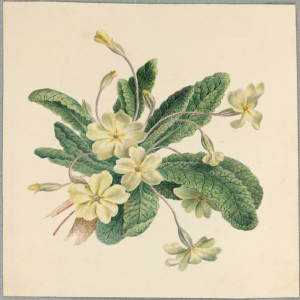

In [14]:
img = cv.imdecode(img_array, -1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

width, height = 300, 300
img = cv.resize(img, (width, height), interpolation=cv.INTER_AREA)
display(img)

## Apply k-means

the k-means algorithm expects the number of clusters to be defined, for this example we will create five clusters.

In order to effectively apply k-means to our `img` array, we will need to re-shape it so that each entry is equivalent to a pixel's RGB values.

Next, we will create a cluster model, with the number of clusters we would like returned. The cluster model is then called with the pixel data.

The output can be observed in using the `cluster_centers_` method which returns the five RGB values around which clusters were formed.

In [16]:
from sklearn.cluster import KMeans

no_of_clusters = 5
pixels = img.reshape(-1, 3)

cluster_model = KMeans(n_clusters=no_of_clusters)
clusters = cluster_model.fit(pixels)

clusters.cluster_centers_

array([[238.1649756 , 224.56192664, 198.34797994],
       [ 74.03540904,  98.72222222,  68.65913716],
       [162.92916887, 163.58793012, 132.50958179],
       [210.37925697, 198.15531476, 152.9627193 ],
       [119.70273542, 137.48838054,  98.90123457]])

### Visualise the results

To visualise the results, we will create a `palette` NumPy array that we will fill up with whole number versions of the `cluster_centers_`. Which will display the output as a horizontal bar displaying the colour associated with each cluster.

array([[[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]],

       [[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]],

       [[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]],

       ...,

       [[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]],

       [[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]],

       [[238, 224, 198],
        [238, 224, 198],
        [238, 224, 198],
        ...,
        [210, 197, 152],
        [210, 197, 152],
        [210, 197, 152]]], dtype=uint8)
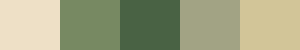

In [6]:
palette = np.zeros((50, width, 3), np.uint8)
steps = width / clusters.cluster_centers_.shape[0]
for idx, centers in enumerate(clusters.cluster_centers_):
  palette[:, int(idx * steps) : (int((idx + 1) * steps)), :] = centers

palette

## References

- [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html)
- [https://www.w3schools.com/python/python_ml_k-means.asp](https://www.w3schools.com/python/python_ml_k-means.asp)